In [139]:
import spacy
from spacy import displacy
import json

from IPython.display import Image
import IPython.display as display
from IPython.display import HTML
import ipywidgets as widgets
import matplotlib.pyplot as plt

## Film yorumlarında kip, kişi, zaman ve duygu durumu ilişkisi

Film<span style="background-color: #FFFF00">i</span> hiç beğen<span style="background-color: #FFFFE0">me</span><span style="background-color: #F08080">di</span><span style="background-color: #EE82EE">m</span>.  

Film<span style="background-color: #FFFF00">i</span> çok çok beğen<span style="background-color: #F08080">di</span><span style="background-color: #EE82EE">m</span>.

##### Program

- Verisetine hızlı bakış
- spaCy Türkçe paketi
- Verisetinden bazı fiil ve fiilimsi örnekleri
- Fiil ekleri
- Fiillerde kip, zaman ve kişi
- Fiiller spaCy'de nasıl gösterilir?
- Fiilimsiler ve syntax
- spaCy'de morphosyntax
- Verisetinde fiil ve fiilimsi avı
- Beğeni sınıflarındaki kök ve ekleri gruplama
- Daha fazlası
- Referanslar

### Veriseti

In [2]:
with open("veriseti/all_movies_reviews.json", "r") as jsfile:
    yorumlar = json.load(jsfile)

In [15]:
yorumlar_olumlu = []
yorumlar_olumsuz = []

for filmjs in yorumlar:
    reviews = filmjs["reviews"]
    for review in reviews:
        text, star = review["review"], review["rating"]
        if star.startswith(("4", "5")):
            yorumlar_olumlu.append(text)
        elif star.startswith(("1", "2")):
            yorumlar_olumsuz.append(text)

In [36]:
yorumlar_olumlu[:3]

['Filmi bugün Nişanlımla birlikte izleme şansım oldu. Avatarı ilk izlediğimde nedense çokta etkisinde kalmamıştım. bu filme de gittiğimde ilk filmi unutmuştum bile. Avatar 2 yi izleyince Avatar evreni ilgimi çekmeyi başardı. üçüncü filmi beklemiyorum desem yalan olur. Üçüncü Filmde fantastik ögelerden çok bilim kurgu yönünün ağır basması filmi daha anlamlı kılacağını düşünüyorum. Umarım üçüncü filmde yönetmen bu konuya önem verir. Onun dışında Film son zamanlarda izlediğim en naif en ahlaklı yapım diyebilirim. Ailecek gönül rahatlığıyla gidip izleyebilirsiniz. Günümüz yapımları gibi saçma sapan cinsel içerikli konuşmalardan, hareketlerden ibaret değildi. Filmde iki önemli mesaj vardı bunlardan biri aile diğeri küresel iklim değişikliği yani Doğa. Hep doğaya hemde aile yaşantısına karşı çokça mesaj çokça replik barındıran anlamlı bir filmdi. (Aile olmak hem en büyük zaafımız hemde en büyük gücümüz.) Üç saat olmasına rağmen hiçbir sıkılmadım. Aksiyon ve Trajediyi harmanlayıp izleyiciye ç

In [32]:
yorumlar_olumsuz[:3]

["İstanbul Forum sinemasında bu filmi 17.12 2022 tarihinde izledim izlediğime izleyeceğime her türlü pişman oldum bir tiyatro yönetmeni olarak filmde hiçbir şeyi anlatmayayım amaçsız bir olgu uğruna beni meşgul eden sevgili yönetmen meslektaşıma sevgilerimi iletiyorum anladınız siz beş para etmez bir film sakın gitmeyin zaten yakında TV'ye düşer ya da internete düşer oradan izlersiniz eğer izleyeceksiniz",
 'Berbat bir film sonu yok gidin çizmeli kedi izleyin daha mantıklıdır bundan - yıldız olsa o bile fazla gerçekten',
 'Bir film bu kadar mı özenilmeden çekilir. En azından bir hukukçu ve emniyetten bir danışman kullanılsaydı. Bu devirde bıyıklı üniformalı polis mi olur. Bir savcı böyle basit hatalar yapacak kadar cahil olamaz... Verilen emeğe yazık.']

### spaCy paketi

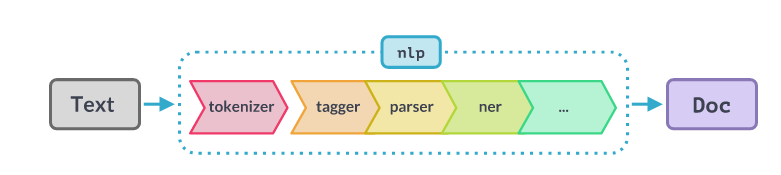

In [6]:
display(Image(filename='assets/spacypipe.png'))

In [9]:
nlp =spacy.load("tr_core_news_trf")

In [13]:
nlp.pipe_names

['transformer',
 'tagger',
 'morphologizer',
 'trainable_lemmatizer',
 'parser',
 'ner']

In [21]:
sentence = "Dün gece eve çok geç gittim."
doc = nlp(sentence)

for token in doc:
    print(token.pos_, token.dep_, token.morph, token.lemma_)

NOUN amod Case=Nom|Number=Sing|Person=3 dün
NOUN obl Case=Nom|Number=Sing|Person=3 gece
NOUN obl Case=Dat|Number=Sing|Person=3 ev
ADV advmod  çok
ADV advmod  geç
VERB ROOT Aspect=Perf|Evident=Fh|Number=Sing|Person=1|Polarity=Pos|Tense=Past git
PUNCT punct  .


### Verisetinden bazi fiil ve fiilimsi örnekleri

In [29]:
sentence = "Filmden beklentim yüksekti ancak hayal kırıklığı oldu. Tavsiye etmiyorum."
doc = nlp(sentence)

displacy.render(doc, style='dep',jupyter=True, options={"distance":120})

In [31]:
sentence = "Tavsiye etmiyeceğim bir film."
doc = nlp(sentence)

displacy.render(doc, style='dep',jupyter=True, options={"distance":120})

In [35]:
sentence = "Filmin devamını sabırsızlıkla bekliyoruz."
doc = nlp(sentence)

displacy.render(doc, style='dep',jupyter=True, options={"distance":120})


### Fiil ekleri

In [43]:
img1=open('assets/finite_suffixes.png','rb').read()
wi1 = widgets.Image(value=img1, format='jpg', width=300, height=400)
img2=open('assets/finite_example.png','rb').read()
wi2 = widgets.Image(value=img2, format='jpg', width=600, height=300)
a=[wi1,wi2]
wid=widgets.HBox(a)
display.display(wid)


In [47]:
img1=open('assets/non-finite-suffixes.png','rb').read()
img2=open('assets/non-finite-example.png','rb').read()
wi1 = widgets.Image(value=img1, format='jpg', width=400, height=250)
wi2 = widgets.Image(value=img2, format='jpg', width=400, height=250)
a=[wi1,wi2]
wid=widgets.HBox(a)
display.display(wid)

### Fiillerde kip ve  zaman 

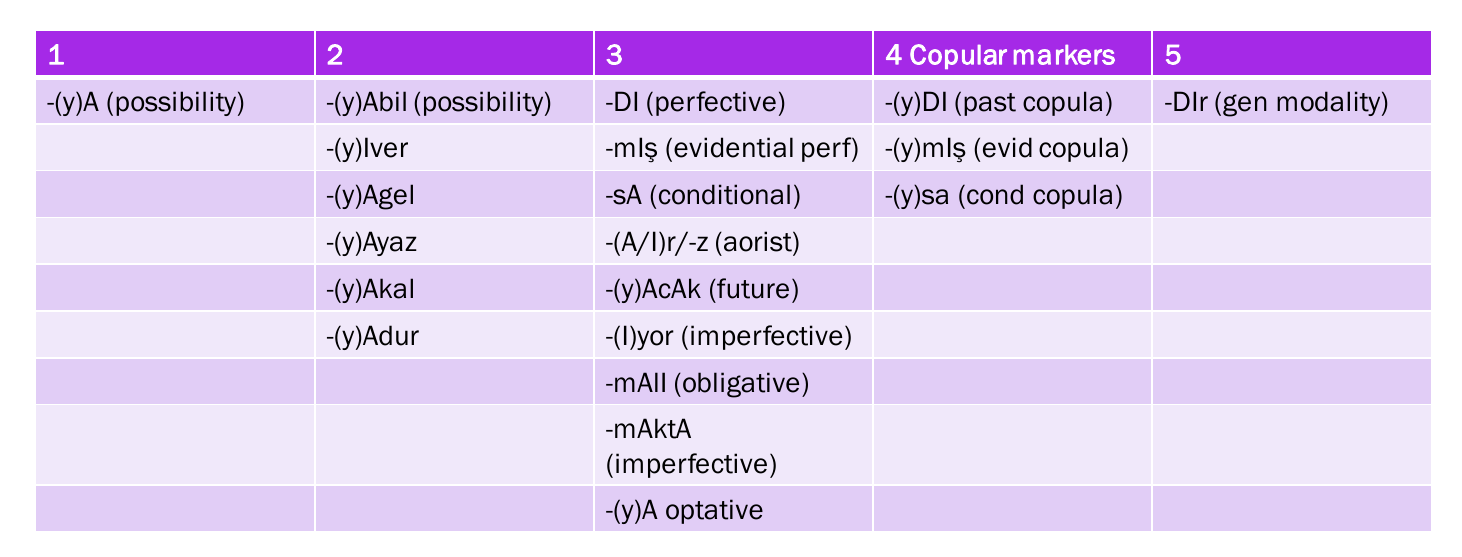

In [4]:
display(Image(filename='assets/mood-modality-ekler.png'))

### Fiiller spaCy'de nasıl gösterilir

In [70]:
sentence = "Dün oraya gittim."
doc = nlp(sentence)

fiil = doc[-2]
fiil, fiil.lemma_, fiil.pos_, fiil.morph

(gittim,
 'git',
 'VERB',
 Aspect=Perf|Evident=Fh|Number=Sing|Person=1|Polarity=Pos|Tense=Past)

In [71]:
sentence = "Dün oraya gitmedim."
doc = nlp(sentence)

fiil = doc[-2]
fiil, fiil.lemma_, fiil.pos_, fiil.morph

(gitmedim,
 'git',
 'VERB',
 Aspect=Perf|Evident=Fh|Number=Sing|Person=1|Polarity=Neg|Tense=Past)

In [72]:
sentence = "Dün oraya gitmiş."
doc = nlp(sentence)

fiil = doc[-2]
fiil, fiil.lemma_, fiil.pos_, fiil.morph

(gitmiş,
 'git',
 'VERB',
 Evident=Nfh|Number=Sing|Person=3|Polarity=Pos|Tense=Past)

In [73]:
sentence = "Oraya gidiyorum."
doc = nlp(sentence)

fiil = doc[-2]
fiil, fiil.lemma_, fiil.pos_, fiil.morph

(gidiyorum,
 'git',
 'VERB',
 Aspect=Prog|Number=Sing|Person=1|Polarity=Pos|Tense=Pres)

In [75]:
sentence = "Oraya gidiyordum."
doc = nlp(sentence)

fiil = doc[-2]
fiil, fiil.lemma_, fiil.pos_, fiil.morph

(gidiyordum,
 'git',
 'VERB',
 Aspect=Prog|Evident=Fh|Number=Sing|Person=1|Polarity=Pos|Tense=Past)

In [76]:
sentence = "Oraya gitmeliyim."
doc = nlp(sentence)

fiil = doc[-2]
fiil, fiil.lemma_, fiil.pos_, fiil.morph

(gitmeliyim, 'git', 'VERB', Mood=Nec|Number=Sing|Person=1|Polarity=Pos)

In [77]:
sentence = "Oraya gitmeliyim."
doc = nlp(sentence)

fiil = doc[-2]
fiil, fiil.lemma_, fiil.pos_, fiil.morph

(gitmeliyim, 'git', 'VERB', Mood=Nec|Number=Sing|Person=1|Polarity=Pos)

In [78]:
sentence = "Oraya gidelim."
doc = nlp(sentence)

fiil = doc[-2]
fiil, fiil.lemma_, fiil.pos_, fiil.morph

(gidelim, 'git', 'VERB', Mood=Opt|Number=Plur|Person=1|Polarity=Pos)

In [85]:
sentence = "Kaşınan yarayı kaşımayın."
doc = nlp(sentence)

fiil = doc[0]
fiil, fiil.lemma_, fiil.pos_, fiil.morph

(Kaşınan, 'Kaşın', 'VERB', Polarity=Pos|Tense=Pres|VerbForm=Part)

In [80]:
sentence = "Oraya giden çocuk geri dönmedi"
doc = nlp(sentence)

fiil = doc[1]
fiil, fiil.lemma_, fiil.pos_, fiil.morph

(giden, 'git', 'VERB', Polarity=Pos|Tense=Pres|VerbForm=Part)

In [88]:
sentence = "Evden bir köpek çıktı."
doc = nlp(sentence)

isim = doc[0]
isim, isim.lemma_, isim.pos_, isim.morph

(Evden, 'ev', 'NOUN', Case=Abl|Number=Sing|Person=3)

In [89]:
sentence = "Oraya gidenler geri dönmediler."
doc = nlp(sentence)

fiil = doc[1]
fiil, fiil.lemma_, fiil.pos_, fiil.morph

(gidenler,
 'git',
 'VERB',
 Case=Nom|Number=Plur|Person=3|Polarity=Pos|Tense=Pres|VerbForm=Part)

In [93]:
sentence = "Arabam çok güzel."
doc = nlp(sentence)

isim = doc[0]
isim, isim.lemma_, isim.pos_, isim.morph

(Arabam,
 'Araba',
 'NOUN',
 Case=Nom|Number=Sing|Number[psor]=Sing|Person=3|Person[psor]=1)

In [87]:
sentence = "Sizin yaşadığınız ilden kimse gelmedi."
doc = nlp(sentence)

fiil = doc[1]
fiil, fiil.lemma_, fiil.pos_, fiil.morph

(yaşadığınız,
 'yaşa',
 'VERB',
 Aspect=Perf|Number[psor]=Plur|Person[psor]=2|Polarity=Pos|Tense=Past|VerbForm=Part)

In [101]:
sentence = "Oraya giderken seni gördüm."
doc = nlp(sentence)

fiil = doc[1]
fiil, fiil.lemma_, fiil.pos_, fiil.morph

(giderken,
 'gider',
 'VERB',
 Case=Nom|Mood=Imp|Number=Sing|Person=3|VerbForm=Conv)

### Fiilimsiler ve syntax

In [103]:
sentence = "Oraya hızlı gittim."
doc = nlp(sentence)

displacy.render(doc, style='dep',jupyter=True, options={"distance":120})

In [102]:
sentence = "Oraya giderken seni gördüm."
doc = nlp(sentence)

displacy.render(doc, style='dep',jupyter=True, options={"distance":120})

In [97]:
sentence = "Tatlı köpek geldi."
doc = nlp(sentence)

displacy.render(doc, style='dep',jupyter=True, options={"distance":120})

In [96]:
sentence = "Oraya giden çocuk geri dönmedi"
doc = nlp(sentence)

displacy.render(doc, style='dep',jupyter=True, options={"distance":120})

In [106]:
sentence = "Sizin yaşadığınız ilden kimse gelmedi."
doc = nlp(sentence)

displacy.render(doc, style='dep',jupyter=True, options={"distance":120})

In [108]:
en_nlp = spacy.load("en_core_web_md")

In [109]:
sentence = "The boy who left earlier didn't return yet."
doc = en_nlp(sentence)

displacy.render(doc, style='dep',jupyter=True, options={"distance":120})

In [110]:
sentence = "I saw you when I was walking my dog."
doc = en_nlp(sentence)

displacy.render(doc, style='dep',jupyter=True, options={"distance":120})

### 

### spaCy'e morphosyntax

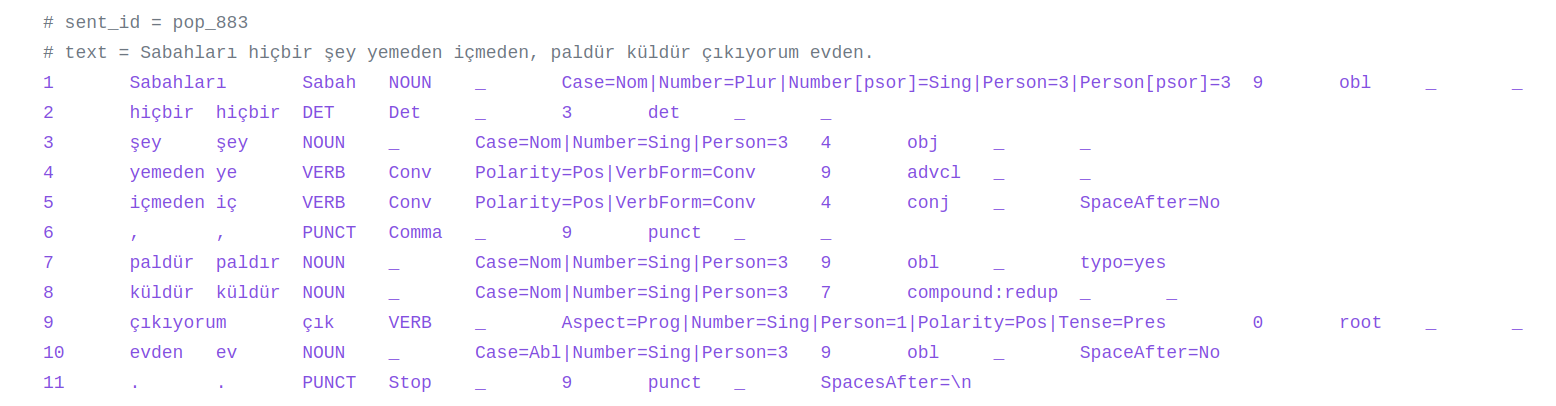

In [95]:
display.display(Image(filename='assets/boun-ornek.png'))

### Verisetinde fiil ve fiilimsi avı

In [118]:
olumlu = {"fiil": [], "fiilimsi": [], "kokler": []}
olumsuz = {"fiil": [], "fiilimsi": [], "kokler": []}

for yorum in yorumlar_olumlu:
    doc = nlp(yorum)
    verbs = [token for token in doc if token.pos_ == "VERB"]
    for verb in verbs:
        morphs = str(verb.morph).split("|")
        if any(["VerbForm" in morph for morph in morphs]):
            olumlu["fiilimsi"] += morphs
            olumlu["kokler"].append(verb.lemma_)
        else:
            olumlu["fiil"] += morphs
            olumlu["kokler"].append(verb.lemma_)
            

In [125]:
for yorum in yorumlar_olumsuz:
    doc = nlp(yorum)
    verbs = [token for token in doc if token.pos_ == "VERB"]
    for verb in verbs:
        morphs = str(verb.morph).split("|")
        if any(["VerbForm" in morph for morph in morphs]):
            olumsuz["fiilimsi"] += morphs
            olumsuz["kokler"].append(verb.lemma_)
        else:
            olumsuz["fiil"] += morphs
            olumsuz["kokler"].append(verb.lemma_)
            

### Beğeni sınıflarındaki kök ve ekleri gruplama

In [122]:
olumlu["kokler"][:10]

['izle', 'ol', 'izle', 'kal', 'unut', 'izley', 'çek', 'başar', 'bekle', 'de']

In [126]:
olumsuz["kokler"][:10]

['izle',
 'izlediği',
 'ol',
 'anlatmay',
 'et',
 'ilet',
 'anla',
 'et',
 'git',
 'düş']

In [121]:
olumlu["fiil"][:10]

['Case=Nom',
 'Number=Sing',
 'Person=3',
 'Polarity=Pos',
 'Aspect=Perf',
 'Evident=Fh',
 'Number=Sing',
 'Person=3',
 'Polarity=Pos',
 'Tense=Past']

In [123]:
olumlu["fiilimsi"][:10]

['Aspect=Perf',
 'Case=Loc',
 'Number=Sing',
 'Number[psor]=Sing',
 'Person=3',
 'Person[psor]=1',
 'Polarity=Pos',
 'Tense=Past',
 'VerbForm=Part',
 'Aspect=Imp']

In [127]:
from collections import Counter

In [129]:
olumlu_fiil_dict = Counter(olumlu["fiil"])
olumlu_fiilimsi_dict = Counter(olumlu["fiilimsi"])
olumlu_kokler=Counter(olumlu["kokler"])

In [130]:
olumsuz_fiil_dict = Counter(olumsuz["fiil"])
olumsuz_fiilimsi_dict = Counter(olumsuz["fiilimsi"])
olumsuz_kokler=Counter(olumsuz["kokler"])

In [180]:
print(olumlu_fiil_dict.most_common(10))
print(olumlu_fiilimsi_dict.most_common(10))
print(olumlu_kokler.most_common(10))

[('Polarity=Pos', 3110), ('Number=Sing', 2926), ('Person=3', 2385), ('Tense=Past', 1129), ('Tense=Pres', 1081), ('Person=1', 805), ('Case=Nom', 743), ('Evident=Fh', 724), ('Aspect=Perf', 687), ('Aspect=Prog', 599)]
[('Polarity=Pos', 1183), ('VerbForm=Part', 1166), ('Tense=Pres', 649), ('Aspect=Perf', 513), ('Tense=Past', 491), ('Number[psor]=Sing', 456), ('Person=3', 380), ('Person[psor]=3', 357), ('Number=Sing', 330), ('Person[psor]=1', 160)]
[('ol', 540), ('izle', 286), ('', 249), ('et', 190), ('yap', 111), ('gel', 90), ('ver', 85), ('de', 84), ('git', 77), ('al', 77)]


In [181]:
print(olumsuz_fiil_dict.most_common(10))
print(olumsuz_fiilimsi_dict.most_common(10))
print(olumsuz_kokler.most_common(10))

[('Polarity=Neg', 6482), ('Number=Sing', 6374), ('Person=3', 5482), ('Tense=Past', 2579), ('Tense=Pres', 2383), ('Evident=Fh', 1550), ('Person=1', 1478), ('Aspect=Perf', 1457), ('Case=Nom', 1430), ('Aspect=Prog', 1362)]
[('Polarity=Neg', 2749), ('VerbForm=Part', 2671), ('Tense=Pres', 1481), ('Aspect=Perf', 1229), ('Tense=Past', 1218), ('Number[psor]=Sing', 1048), ('Person[psor]=3', 846), ('Person=3', 794), ('Number=Sing', 746), ('VerbForm=Conv', 374)]
[('ol', 1420), ('', 631), ('izle', 414), ('et', 394), ('yap', 292), ('de', 208), ('ver', 206), ('gel', 194), ('al', 155), ('git', 152)]


In [136]:
from wordcloud import WordCloud

(-0.5, 599.5, 599.5, -0.5)

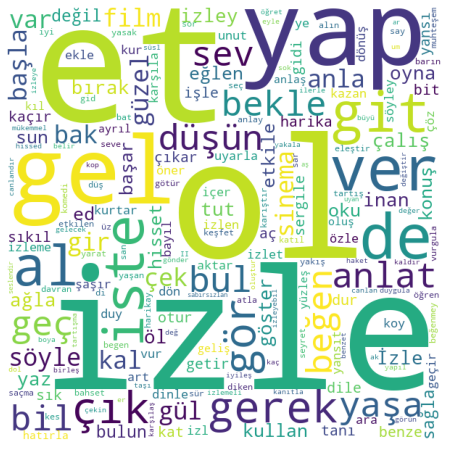

In [185]:
olumlu_koklert =""
for key, val in olumlu_kokler.items():
    newk = key.replace("=", "_").replace(",", "_")
    k = (newk + " ") * val
    olumlu_koklert += k
    
olumlu_koklert = olumlu_koklert.strip()

wordcloud = WordCloud(background_color="white", contour_width=3, contour_color='steelblue', width = 600, height = 600, repeat=True, collocations = False,scale=1)
wordcloud.generate(olumlu_koklert)

plt.figure(figsize = [8, 8])
plt.imshow(wordcloud)
plt.axis("off")

(-0.5, 599.5, 599.5, -0.5)

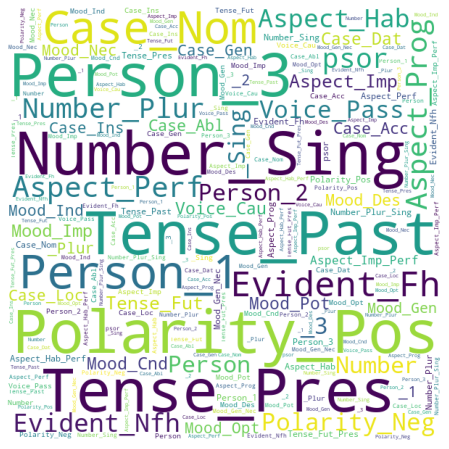

In [182]:
olumlu_fiil_ekleri =""
for key, val in olumlu_fiil_dict.items():
    newk = key.replace("=", "_").replace(",", "_")
    k = (newk + " ") * val
    olumlu_fiil_ekleri += k
    
olumlu_fiil_ekleri = olumlu_fiil_ekleri.strip()

wordcloud = WordCloud(background_color="white", contour_width=3, contour_color='steelblue', width = 600, height = 600, repeat=True, collocations = False,scale=1)
wordcloud.generate(olumlu_fiil_ekleri)

plt.figure(figsize = [8, 8])
plt.imshow(wordcloud)
plt.axis("off")

In [176]:
olumlu_fiilimsi_ekleri =""
for key, val in olumlu_fiilimsi_dict.items():
    newk = key.replace("=", "_").replace(",", "_")
    k = (newk + " ") * val
    olumlu_fiilimsi_ekleri += k
    
olumlu_fiilimsi_ekleri = olumlu_fiilimsi_ekleri.strip()

(-0.5, 599.5, 599.5, -0.5)

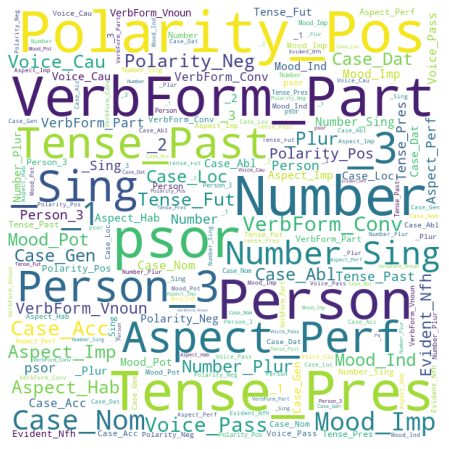

In [183]:
wordcloud = WordCloud(background_color="white", contour_width=3, contour_color='steelblue', width = 600, height = 600, repeat=True, collocations = False,scale=1)
wordcloud.generate(olumlu_fiilimsi_ekleri)

plt.figure(figsize = [8, 8])
plt.imshow(wordcloud)
plt.axis("off")

---

(-0.5, 599.5, 599.5, -0.5)

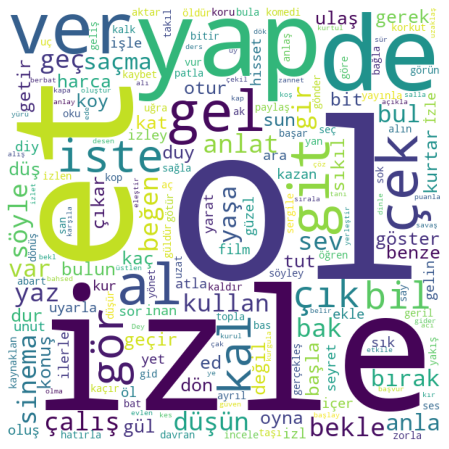

In [187]:
olumsuz_koklert =""
for key, val in olumsuz_kokler.items():
    newk = key.replace("=", "_").replace(",", "_")
    k = (newk + " ") * val
    olumsuz_koklert += k
    
olumsuz_koklert = olumsuz_koklert.strip()

wordcloud = WordCloud(background_color="white", contour_width=3, contour_color='steelblue', width = 600, height = 600, repeat=True, collocations = False,scale=1)
wordcloud.generate(olumsuz_koklert)

plt.figure(figsize = [8, 8])
plt.imshow(wordcloud)
plt.axis("off")

<function matplotlib.pyplot.show(close=None, block=None)>

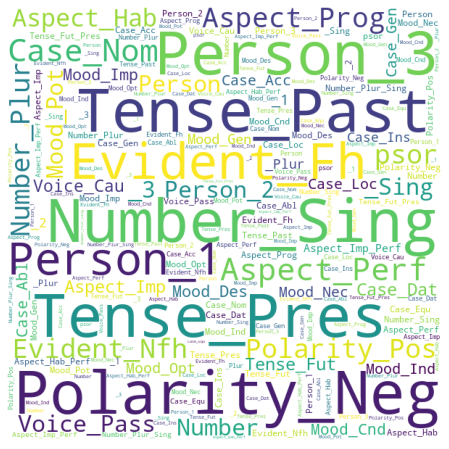

In [178]:
olumsuz_fiil_ekleri =""
for key, val in olumsuz_fiil_dict.items():
    newk = key.replace("=", "_").replace(",", "_")
    k = (newk + " ") * val
    olumsuz_fiil_ekleri += k
    
olumsuz_fiil_ekleri = olumsuz_fiil_ekleri.strip()

wordcloud = WordCloud(background_color="white", contour_width=3, contour_color='steelblue', width = 600, height = 600, repeat=True, collocations = False,scale=1)
wordcloud.generate(olumsuz_fiil_ekleri)

plt.figure(figsize = [8, 8])
plt.imshow(wordcloud)
plt.axis("off")

<function matplotlib.pyplot.show(close=None, block=None)>

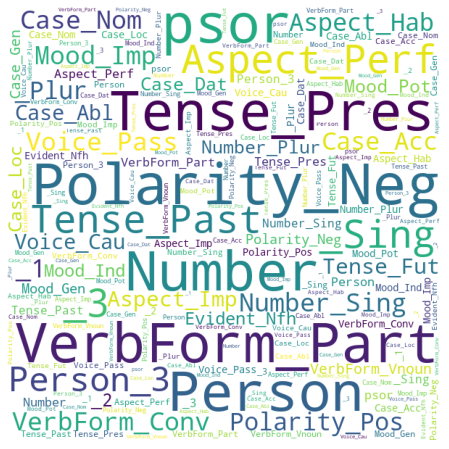

In [179]:
olumsuz_fiilimsi_ekleri =""
for key, val in olumsuz_fiilimsi_dict.items():
    newk = key.replace("=", "_").replace(",", "_")
    k = (newk + " ") * val
    olumsuz_fiilimsi_ekleri += k
    
olumsuz_fiilimsi_ekleri = olumsuz_fiilimsi_ekleri.strip()

wordcloud = WordCloud(background_color="white", contour_width=3, contour_color='steelblue', width = 600, height = 600, repeat=True, collocations = False,scale=1)
wordcloud.generate(olumsuz_fiilimsi_ekleri)

plt.figure(figsize = [8, 8])
plt.imshow(wordcloud)
plt.axis("off")

### Daha fazlası

- [Baştan sona Türkçe linguistik](https://www.youtube.com/watch?v=ZiArCDOuNVo&list=PLJTHlIwB8Vcqltlhbmsc12Srthv73OeOF&index=1)
- [Hızlı spaCy Türkçe tarifleri](https://www.youtube.com/watch?v=w0WCkgCOzzw&list=PLJTHlIwB8VcoWxYHnsZOQCxWOraW42NBj&index=1)

### Referanslar

- Turkish: A comprehensive Grammar;  Aslı Göksel, Celia Kerslake  

https://books.google.de/books/about/Turkish.html?id=7fXCKZmee8QC

- spaCy Turkish model
https://huggingface.co/turkish-nlp-suite

- spaCy : https://spacy.io/

- BOUN treebank: https://github.com/UniversalDependencies/UD_Turkish-BOUN
- Dependencyler: https://universaldependencies.org/tr/dep/
